In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_columns = None
plt.style.use('seaborn-deep')
plt.style.use("seaborn-darkgrid")

In [33]:
df = pd.read_csv('../data/train_data_cleaned_full.csv')
#split categorical and numerical variables
col_num = df.select_dtypes(include = np.number).columns
col_cat = df.select_dtypes(include = 'object').columns
print(col_num)
print(col_cat)
print(df.shape)
df.sample(5)

Index(['weight', 'table_percent', 'price', 'depth_percent'], dtype='object')
Index(['quality', 'color', 'clarity'], dtype='object')
(40347, 7)


,weight,quality,color,clarity,table_percent,price,depth_percent
32848,1.05,Ideal,H,SI2,0.56,2.129778,0.619
4457,0.31,Good,F,VS2,0.56,1.862218,0.639
15696,0.33,Ideal,G,VVS1,0.55,1.906724,0.617
4514,1.00,Fair,D,SI2,0.56,2.103890,0.652
27253,1.53,Ideal,G,SI2,0.57,2.184590,0.617


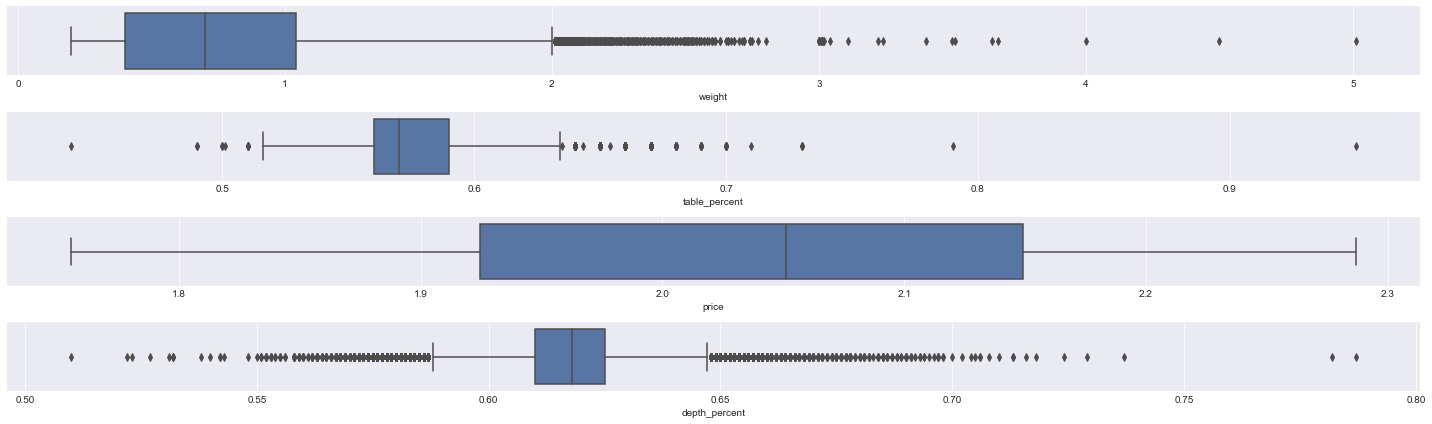

In [34]:
#plot outliers
fig, axes = plt.subplots(4, 1, figsize=(20,6))

for i in range(len(col_num)):
    sns.boxplot(x=df[col_num].columns[i], data=df[col_num], ax=axes[i])
    plt.tight_layout()
plt.show();

In [35]:
#get outliers
def find_outliers(columns, dataframe): 
    dicc_indexes = {}
    for col in columns:
        Q1 = np.nanpercentile(df[col], 25)
        Q3 = np.nanpercentile(df[col], 75)
        IQR = Q3 - Q1
        outlier_step = 2.5 * IQR
        outliers_data = dataframe[(dataframe[col] < Q1 - outlier_step) | (dataframe[col] > Q3 + outlier_step)]
        if outliers_data.shape[0] > 0:
            dicc_indexes[col] = (list(outliers_data.index))    
    return dicc_indexes

outliers = find_outliers(col_num, df)
outliers_list = []
for k, v in outliers.items():
    print('Column: ', k, '\n', 'Outliers: ', len(v))
    for i in v:
        outliers_list.append(i)
outliers_list = set(outliers_list)
outliers_list = list(outliers_list)
print('total outliers found:', len(outliers_list))
df.drop(outliers_list, axis=0, inplace=True)
df.shape

Column:  weight 
 Outliers:  50
Column:  table_percent 
 Outliers:  66
Column:  depth_percent 
 Outliers:  429
total outliers found: 518


(39829, 7)

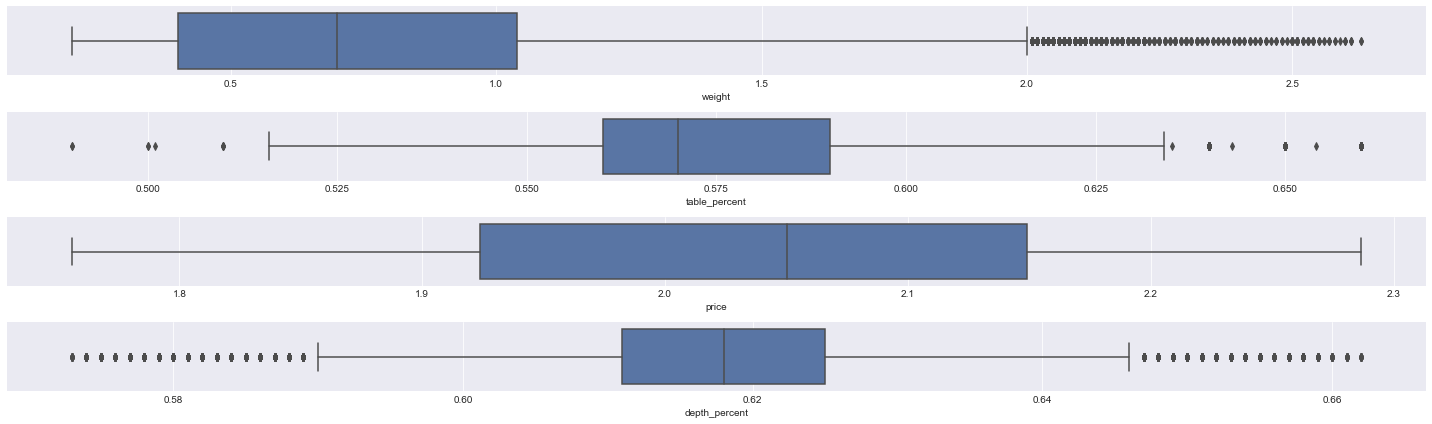

In [36]:
#plot outliers
fig, axes = plt.subplots(4, 1, figsize=(20,6))

for i in range(len(col_num)):
    sns.boxplot(x=df[col_num].columns[i], data=df[col_num], ax=axes[i])
    plt.tight_layout()
plt.show();

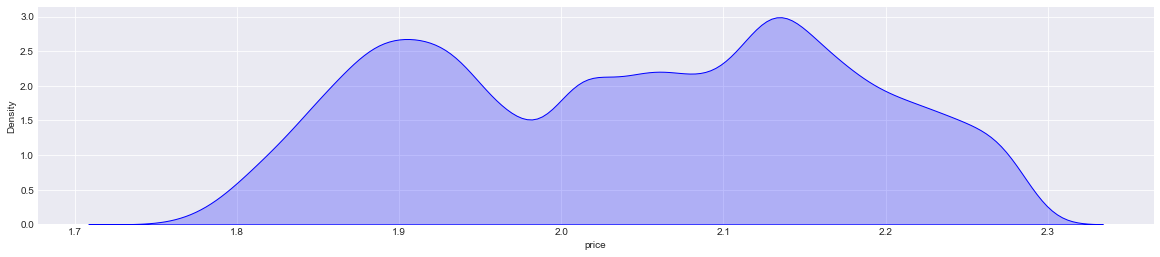

In [37]:
#plot response variable distribution
fig, axes = plt.subplots(figsize = (20, 4))
sns.distplot(df.price, hist = False, color = "blue", kde_kws = {"shade": True, "linewidth": 1});

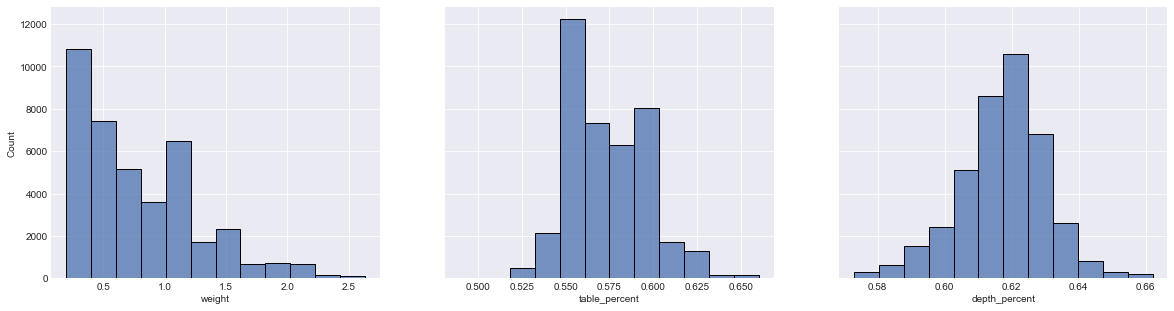

In [38]:
#plot numerical variables distribution
fig, ax = plt.subplots(1, 3, figsize = (20,5), sharey=True)
ax = ax.flat
df_num = df[col_num.drop('price')]
counter = 0
for i in df_num.columns:
    sns.histplot(df_num[i], kde = False, ax = ax[counter], bins=12)
    counter += 1
plt.show();

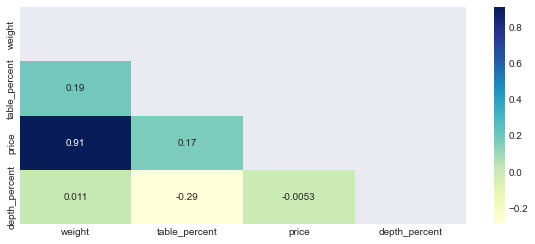

In [39]:
#headmap corr plot
fig, axes = plt.subplots(figsize = (10, 4))
mask = np.triu(np.ones_like(df[col_num].corr(), dtype = np.bool))
sns.heatmap(df[col_num].corr(), 
           cmap = "YlGnBu", 
            mask = mask,
           annot = True);

price vs depth_percent have no correlation


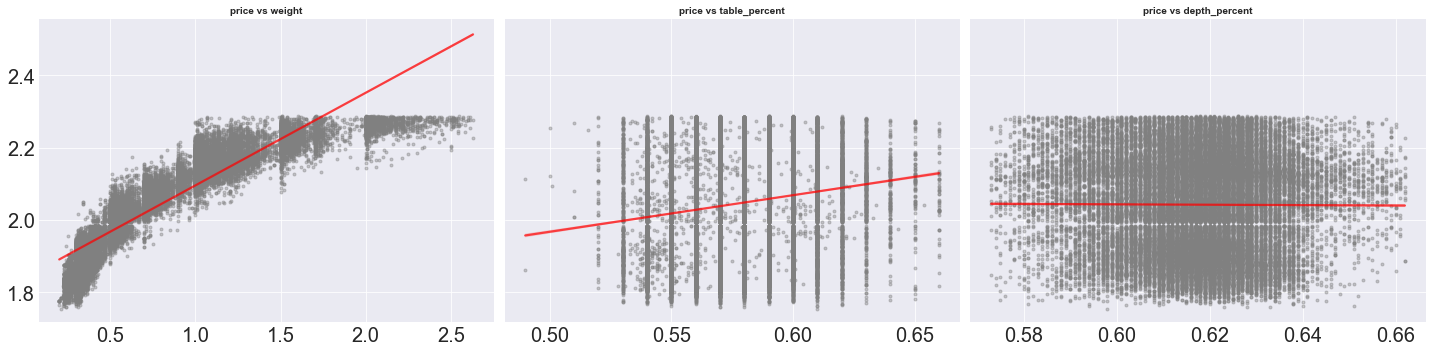

In [40]:
#plotteamos correlaciones entre variables predictoras y respuesta
fig, axes = plt.subplots(1, 3, figsize = (20,5), sharey=True)
axes = axes.flat
for i, colum in enumerate(df_num.columns):
    sns.regplot(
        x = df[colum], 
        y = df["price"], 
        color = "gray", 
        marker = ".", 
        scatter_kws = {"alpha": 0.4}, 
        line_kws = {"color": "red", "alpha": 0.7 }, 
        ax = axes[i])
    
    axes[i].set_title(f"price vs {colum}", fontsize = 10, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")
    
fig.tight_layout();
print('price vs depth_percent have no correlation')

In [20]:
#export to csv
df.to_csv('../data/train_data_wo_outliers_full.csv', index=False)

In [41]:
df

,weight,quality,color,clarity,table_percent,price,depth_percent
0,0.30,Premium,D,SI2,0.58,1.848927,0.624
1,1.01,Ideal,E,VVS2,0.56,2.217354,0.627
2,0.72,Ideal,F,VS2,0.59,2.077314,0.618
3,1.08,Very Good,G,SI2,0.57,2.124773,0.632
4,0.36,Premium,G,VS1,0.59,1.885250,0.623
...,...,...,...,...,...,...,...
40342,0.42,Premium,D,SI2,0.59,1.879618,0.621
40343,0.53,Premium,G,VS2,0.58,1.999045,0.620
40344,0.80,Good,G,SI2,0.58,2.050013,0.628
40345,1.01,Very Good,F,VS2,0.57,2.166307,0.615


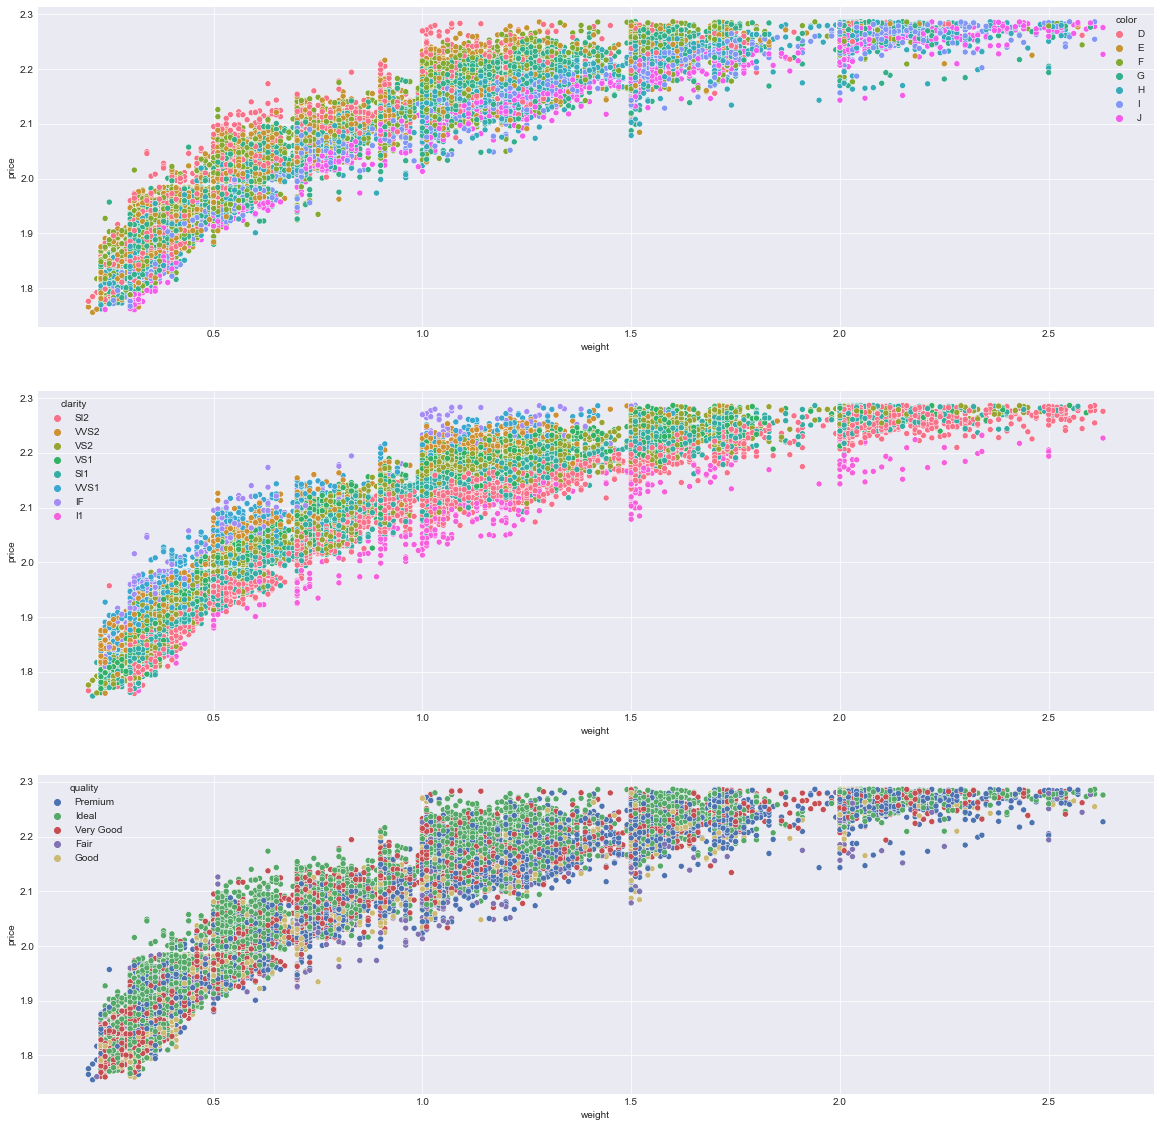

In [44]:
mapping = {'quality':['Fair', 'Good', 'Very Good', 'Premium', 'Ideal'], 
            'color':['J', 'I', 'H', 'G', 'F', 'E', 'D'],
            'clarity':['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']}
fig, axes = plt.subplots(3, 1, figsize = (20,20), sharey=True)
sns.scatterplot(data = df, y = df['price'], x = df['weight'], hue = "color", ax = axes[0])
sns.scatterplot(data = df, y = df['price'], x = df['weight'], hue = "clarity", ax = axes[1])
sns.scatterplot(data = df, y = df['price'], x = df['weight'], hue = "quality", ax = axes[2]);

In [46]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
weight,39829.0,0.791329,0.467741,0.200000,0.400000,0.700000,1.040000,2.630000
table_percent,39829.0,0.574093,0.021549,0.490000,0.560000,0.570000,0.590000,0.660000
price,39829.0,2.042662,0.131350,1.755614,1.923957,2.050399,2.149201,2.286659
depth_percent,39829.0,0.617414,0.012922,0.573000,0.611000,0.618000,0.625000,0.662000
